<a href="https://colab.research.google.com/github/carlosontiveross/AnaliseAIRBNB/blob/main/Projeto_An%C3%A1lise_de_dados_do_AIRBNB_Lisboa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Lisboa

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel!**

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2021, a Startup fundada em Agosto de 2008 já havia hospedado mais de **1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html) é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, serão analisados os dados referentes à cidade de Lisboa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Primeiramente, será importado a base de dados do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html) para realizar a exploração dos dados. Para este trabalho, será utilizada a base da dados da cidade de Lisboa, em Portugal, disponibilizados pela plataforma.


In [10]:
# importar os pacotes necessarios
import pandas as pd
import sympy as smp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# importar o arquivo listings.csv para um DataFrame
df_lisboa = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2022-09-13/visualisations/listings.csv")

#visualizar o Dataframe
display(df_lisboa)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6499,Belém 1 Bedroom Historical Apartment,14455,Bruno,Lisboa,Belm,38.697500,-9.197680,Entire home/apt,69,3,44,2022-08-09,0.45,1,195,15,NaN
1,36664873,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,95,2,21,2022-09-03,0.56,1,72,8,42622/AL
2,25345952,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,65,5,37,2022-08-18,0.89,2,269,16,Exempt
3,25659,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,54,2,166,2022-09-11,1.62,1,304,45,56539/AL.
4,28283003,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,59,3,12,2022-08-29,0.27,3,170,5,84329/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19646,53231233,"One bedroom appartement with city view, terrac...",430962633,"Loic, Estelle And Co",Lourinh,So Bartolomeu dos Galegos e Moledo,39.332474,-9.269022,Entire home/apt,65,1,0,NaN,NaN,1,364,0,102344/AL
19647,21516615,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,146,2,14,2022-09-01,0.38,3,0,7,43425/AL
19648,9167609,Praia Grande Apartment,42212160,Portugal,Sintra,Colares,38.813240,-9.478880,Entire home/apt,168,3,8,2017-11-07,0.10,25,365,0,NaN
19649,564598402163402869,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,180,1,3,2022-08-16,0.60,10,364,3,16046/AL


## Entendendo os dados

Antes de iniciar as análises dos dados disponíveis, é importante entender as variáveis que irão ser trabalhadas. Uma primeira etapa muito importante de qualquer projeto de Data Science é construir o *Dicionário de Variáveis*, que permite a quem vai realizar as análises criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados a partir da descrição do que significa cada variável. Abaixo está o *Dicionário de variáveis* do dataset sendo analisado.

###**Dicionário das variáveis**

* id - Número de identificação do imóvel;
* name - Nome utilizado para anunciar o imóvel;
* host_id - Número de identificação do proprietário do imóvel;
* host_name - Nome do proprietário do imóvel;
* neighbourhood_group - Região do imóvel;
* neighbourhood - Bairro onde o imóvel está localizado;
* latitude - Latitude do imóvel;
* longitude - Longitude do imóvel;
* room_type - Tipo de imóvel que está sendo anunciado;
* price - Preço para alugar o imóvel;
* minimum_nights - Número mínimo de noites para alugar o imóvel;
* number_of_reviews - Número de avaliações do imóvel;
* last_review - Data da última avaliação do imóvel;
* reviews_per_month - Avaliações por mês do imóvel;
* calculated_host_listings_count - Número de imóveis do mesmo anfitrião.
* availability_365 - Disponibilidade do imóvel no período de 1 ano (365 dias);
* number_of_reviews_ltm - Número de avaliações do imóvel nos últimos 12 meses;
* license - Licença pra alugar o imóvel no AirBNB.

## **Exploração inicial do DataSet**

Após ter feito o *Dicionário de variáveis* e entendido melhor as variáveis que constam no Dataset a serem analisados, é chegada a hora de começar a trabalhar nos dados. Um primeiro passo da exploração do Dataset é identificar a quantidade de entradas que o conjunto de dados possui e ver os tipos de cada coluna.



In [12]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_lisboa.shape[0])) #a função .format() transforma a variável em uma string, que será colocada dentro do {}
print("Variáveis:\t {} \n".format(df_lisboa.shape[1])) #a função .format()transforma a variável em uma string, que será colocada dentro do {}

# verificar os tipos de variáveis do DataFrame
display(df_lisboa.dtypes)

Entradas:	 19651
Variáveis:	 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

O Dataset possui 19651 entrada de dados distribuidas em 18 variáveis.

## Valores Ausentes no Dataset

É importante, ao analisar um Dataset, verificar os valores ausentes e tratá-los. Primeiramente será levatanda a porcentagem de valores ausentes no Dataset:


In [13]:
# Cria um novo dataframe contendo valores booleanos indicando se cada célula do dataframe original é nula ou não
df_lisboa_isnull = df_lisboa.isnull()

# Exibe o novo dataframe na tela
display(df_lisboa_isnull)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19646,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
19647,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
19648,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
19649,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
df_lisboa_nulos_array = (df_lisboa.isnull().sum() / df_lisboa.shape[0]).sort_values(ascending=False)
# a função isnull() verifica quais os valores não constam no DATASET, a função sum() soma esses valores faltantes contidos na função isnull()

In [15]:
display(df_lisboa_nulos_array)

reviews_per_month                 0.098417
last_review                       0.098417
license                           0.069309
name                              0.000407
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

In [16]:
#criando um dataframe só com os dados nulos de lisboa
df_lisboa_nulos = pd.DataFrame(df_lisboa_nulos_array*100, columns=['porcentagem'])

In [17]:
#vendo as 5 primeiras linhas do dataset de dados nulos de Lisboa
df_lisboa_nulos.head(18)

,porcentagem
reviews_per_month,9.841738
last_review,9.841738
license,6.930945
name,0.040710
number_of_reviews_ltm,0.000000
availability_365,0.000000
calculated_host_listings_count,0.000000
number_of_reviews,0.000000
minimum_nights,0.000000
id,0.000000


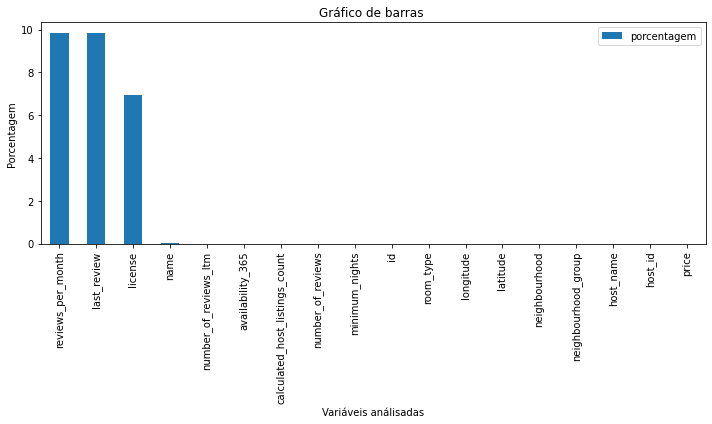

In [18]:
# plotar o gráfico de barras com a entrada média de passageiros a partir da abordagem orientada a objetos
fig, ax = plt.subplots(figsize=(10,6))

#criando o dataset a partir da coluna porcentagem do dataset df_lisboa_nulos
df_lisboa_nulos.porcentagem=pd.to_numeric(df_lisboa_nulos.porcentagem)

df_lisboa_nulos.plot(kind="bar", ax=ax)
#aqui, o gráfico foi plotado a partir da biblioteca Pandas, e não do Matplotlib

#Editando o gráfico
ax.set_title("Gráfico de barras ")
ax.set_xlabel("Variáveis análisadas")
ax.set_ylabel("Porcentagem")

plt.tight_layout()

A partir das informações acima, é possível inferir que:
* As colunas `reviews_per_month`, `last_review` possuem quase 10% de valores ausentes em suas linhas.
* A coluna `license` possui quase 7% de valores ausentes em suas linhas.
* O restante das variáveis possuem pouco ou nenhum valor ausente.

De forma a melhorar a análise, serão agora retiradas as linhas que possuem valores nulos.

In [19]:
# retirando as linhas do DataSet que possuem alguma variável com valor nulo, mantedo o DATASET Lisboa
df_lisboa.dropna(axis=0, inplace= True)

In [20]:
# Verificando se ainda há variáveis com valores ausentes no DataSet
df_lisboa_limpo_verificando = (df_lisboa.isnull().sum() / df_lisboa.shape[0]).sort_values(ascending=False)

display(df_lisboa_limpo_verificando)

id                                0.0
name                              0.0
number_of_reviews_ltm             0.0
availability_365                  0.0
calculated_host_listings_count    0.0
reviews_per_month                 0.0
last_review                       0.0
number_of_reviews                 0.0
minimum_nights                    0.0
price                             0.0
room_type                         0.0
longitude                         0.0
latitude                          0.0
neighbourhood                     0.0
neighbourhood_group               0.0
host_name                         0.0
host_id                           0.0
license                           0.0
dtype: float64

Como observado acima, não há mais dados nulos a serem analisados no DataSet. Será agora verificado como ficaram os números de colunas e linhas do Dataset após a retirada dos dados nulos.

In [21]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df_lisboa.shape[0]))
print("Variáveis:\t {}\n".format(df_lisboa.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df_lisboa.dtypes)

Entradas:	 16499
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

O número de linhas, após a retirada das linhas que continham algum valor ausente, baixaram de 19651 para 16499, uma diminuição de aproximadamente 16% no número de linha do Dataframe.

## Tratando Outliers



Outra etapa importante da preparação dos dados, antes da análise propriamente dita, é o tratamento dos Outliers. Outliers são dados muito discrepantes que estão presente em um Dataset, são valores que fogem da normalidade e podem causar alterações nos resultados das análises. O tratamento dos outliers nesta análise foi através da utilização da técnica do Z-Score.


### Z-Score ###

A técnica do Z-score possui como objetivo apontar qual a distância entre um dado qualquer do dataset e a média do dataset. Seguindo a explicação contida no site [Acervo Lima](https://acervolima.com/z-score-em-estatisticas/)
O Z-score pode ser interpretado da seguinte maneira:

* Um elemento com uma pontuação z menor que 0 representa que o elemento é menor que a média.
* Um elemento com uma pontuação z maior do que 0 representa que o elemento é maior do que a média.
* Um elemento com pontuação z igual a 0 representa que o elemento é igual à média.
* Um elemento com uma pontuação z igual a 1 representa que o elemento é 1 desvio padrão maior do que a média; um score z igual a 2, 2 desvios padrão maiores do que a média e assim por diante.
* Um elemento com uma pontuação z igual a -1 representa que o elemento é 1 desvio padrão menor do que a média; um score z igual a -2, 2 desvios padrão menores que a média e assim por diante.
* Se o número de elementos em um determinado conjunto tiverem uma distribuição normal, cerca de 68% dos elementos têm um score z entre -1 e 1; cerca de 95% têm uma pontuação z entre -2 e 2; cerca de 99% têm um score z entre -3 e 3. Isso é conhecido como regra empírica ou regra 68-95-99,7 e pode ser observado na imagem abaixo:

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20210525140711/empiricalrule-660x388.png" height="400px"></center>

Para maiores informações sobre a técnica z-score, acessar o [link](https://acervolima.com/z-score-em-estatisticas/).

Antes de utilizar a técnica Z-score, foi feita uma análise geral estatística das variáveis numéricas que compõe o Dataset, que podem ser vistas a seguir:

In [22]:
#dados estatísticos gerais do Dataframe
df_lisboa_estatistica = pd.DataFrame(df_lisboa[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']].describe())

display(df_lisboa_estatistica)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000,16499.000000
mean,131.577611,3.341415,60.400873,1.556611,16.767743,212.190072,16.408085
std,225.042979,11.927809,84.138747,1.534071,42.590066,122.766789,19.535656
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,69.000000,1.000000,8.000000,0.470000,1.000000,103.000000,3.000000
50%,100.000000,2.000000,26.000000,1.120000,4.000000,255.000000,10.000000
75%,150.000000,3.000000,79.000000,2.230000,13.000000,321.000000,24.000000
max,22000.000000,730.000000,1961.000000,60.390000,292.000000,365.000000,653.000000


Agora será realmente utilizada a técnica do Z-score para cálculo dos outliers. Primeiramente foi criado um dataset somente com as variáveis numéricas do dataframe:

In [23]:
#criando um dataframe das variáveis numéricas
df_lisboa_numerico = pd.DataFrame(df_lisboa[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']])

display(df_lisboa_numerico)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,95,2,21,0.56,1,72,8
2,65,5,37,0.89,2,269,16
3,54,2,166,1.62,1,304,45
4,59,3,12,0.27,3,170,5
5,25,1,8,2.14,1,338,8
...,...,...,...,...,...,...,...
19644,70,2,2,0.09,1,250,1
19645,90,2,68,1.24,1,220,22
19647,146,2,14,0.38,3,0,7
19649,180,1,3,0.60,10,364,3


E também um dataset somente com as variáveis do tipo string.

In [24]:
#criando um dataframe das variáveis do tipo string
df_lisboa_string = pd.DataFrame(df_lisboa[['name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
    'room_type', 'last_review', 'license']])


display(df_lisboa_string)

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
1,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,2022-09-03,42622/AL
2,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,2022-08-18,Exempt
3,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,2022-09-11,56539/AL.
4,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,2022-08-29,84329/AL
5,La Caz O Soleil de Lapa (sans cuisine),22145635,Christine,Azambuja,Aveiras de Cima,39.165900,-8.884790,Private room,2022-08-31,Exempt
...,...,...,...,...,...,...,...,...,...,...
19644,Quarto com acesso à sala no centro de Almada,85446248,Sandra,Lisboa,Estrela,38.676530,-9.164220,Private room,2022-08-16,Exempt
19645,Apartamento Tejo,170117548,Manuela,Lisboa,Estrela,38.685380,-9.150210,Entire home/apt,2022-08-27,63358/AL
19647,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,2022-09-01,43425/AL
19649,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,2022-08-16,16046/AL


Foram calculados então os z-scores dos valores contidos nas colunas do dataset numericos. O método utilizado foi a criação de novas colunas contendo os valores de z-score calculados de cada uma das linhas das variáveis, de forma a utilizar essas novas colunas e seus valores para decidir se o valor é um Outlier ou não.

In [25]:
#cálculo de z-score
#listando as colunas contidas no dataset numérico de Lisboa na variável col
cols = list(df_lisboa_numerico.columns)

#utilizando o for, que irá gerar uma nova coluna com os valores de z-score para cada coluna com valores numéricos
# O for é uma estrutura de repetição que se repete até o final da lista

for col in cols: #temos col assumindo o valor de cols, que foi definido acima, irá rodar todas a lista até o final, e então assumir o próximo col, até terminar de rodar toda a lista de 
    col_zscore = col + '_zscore' #dando nome a nova coluna
    df_lisboa_numerico[col_zscore] = (df_lisboa_numerico[col] - df_lisboa_numerico[col].mean())/df_lisboa_numerico[col].std(ddof=0) #calculando o valor de z-score e colocando o resultado uma nova coluna


O dataset obtido pode ser visto abaixo:

In [26]:
display(df_lisboa_numerico)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_zscore,minimum_nights_zscore,number_of_reviews_zscore,reviews_per_month_zscore,calculated_host_listings_count_zscore,availability_365_zscore,number_of_reviews_ltm_zscore
1,95,2,21,0.56,1,72,8,-0.162541,-0.112465,-0.468299,-0.649671,-0.370232,-1.141956,-0.43041
2,65,5,37,0.89,2,269,16,-0.295853,0.139056,-0.278131,-0.434550,-0.346752,0.462761,-0.02089
3,54,2,166,1.62,1,304,45,-0.344734,-0.112465,1.255097,0.041322,-0.370232,0.747863,1.46362
4,59,3,12,0.27,3,170,5,-0.322515,-0.028624,-0.575268,-0.838716,-0.323272,-0.343671,-0.58398
5,25,1,8,2.14,1,338,8,-0.473602,-0.196305,-0.622810,0.380300,-0.370232,1.024819,-0.43041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,70,2,2,0.09,1,250,1,-0.273634,-0.112465,-0.694123,-0.956054,-0.370232,0.307991,-0.78874
19645,90,2,68,1.24,1,220,22,-0.184760,-0.112465,0.090319,-0.206392,-0.370232,0.063618,0.28625
19647,146,2,14,0.38,3,0,7,0.064089,-0.112465,-0.551497,-0.767009,-0.323272,-1.728452,-0.48160
19649,180,1,3,0.60,10,364,3,0.215176,-0.196305,-0.682238,-0.623595,-0.158909,1.236609,-0.68636


Para essa análise será utilizado o valor de v-score de -2 e 2 para determinar os outliers. Será agora feito o tratamento dos outliers de cada variável numérica do Dataset.

### price ###

Para realizar o tratamento da variável **price**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [27]:
#criando dataframe somente com as variáveis price e price_zscore
df_lisboa_price = pd.DataFrame(df_lisboa_numerico[['price',"price_zscore"]])

display(df_lisboa_price)

,price,price_zscore
1,95,-0.162541
2,65,-0.295853
3,54,-0.344734
4,59,-0.322515
5,25,-0.473602
...,...,...
19644,70,-0.273634
19645,90,-0.184760
19647,146,0.064089
19649,180,0.215176


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [28]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_price_arrumado_positivo = pd.DataFrame(df_lisboa_price.loc[df_lisboa_price['price_zscore'] > -2])
df_lisboa_price_arrumado_final = pd.DataFrame(df_lisboa_price_arrumado_positivo.loc[df_lisboa_price_arrumado_positivo['price_zscore'] < 2])

display(df_lisboa_price_arrumado_final)

,price,price_zscore
1,95,-0.162541
2,65,-0.295853
3,54,-0.344734
4,59,-0.322515
5,25,-0.473602
...,...,...
19644,70,-0.273634
19645,90,-0.184760
19647,146,0.064089
19649,180,0.215176


Verificando o gráfico de bloxpot da variável `price` antes e depois da retirada dos outliers.

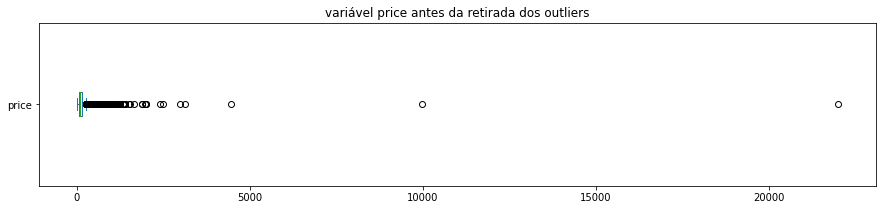

In [29]:
# variável price antes da retirada dos outliers
df_lisboa.price.plot(kind='box', vert=False, figsize=(15, 3), title = "variável price antes da retirada dos outliers")


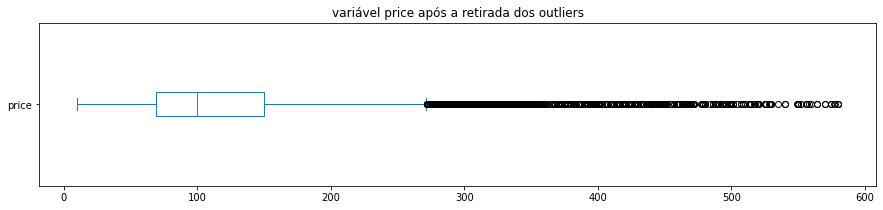

In [30]:
# variável price após a retirada dos outliers
df_lisboa_price_arrumado_final.price.plot(kind='box', vert=False, figsize=(15, 3),title = "variável price após a retirada dos outliers")

#### minimum_nights ####

Para realizar o tratamento da variável **minimum_nights**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [31]:
#criando dataframe somente com as variáveis minimum_nights e minimum_nights_zscore
df_lisboa_minimum_nights = pd.DataFrame(df_lisboa_numerico[['minimum_nights',"minimum_nights_zscore"]])

display(df_lisboa_minimum_nights)

,minimum_nights,minimum_nights_zscore
1,2,-0.112465
2,5,0.139056
3,2,-0.112465
4,3,-0.028624
5,1,-0.196305
...,...,...
19644,2,-0.112465
19645,2,-0.112465
19647,2,-0.112465
19649,1,-0.196305


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [32]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2
df_lisboa_minimum_nights_arrumado_positivo = pd.DataFrame(df_lisboa_minimum_nights.loc[df_lisboa_minimum_nights['minimum_nights_zscore'] > -2])
df_lisboa_minimum_nights_arrumado_final = pd.DataFrame(df_lisboa_minimum_nights_arrumado_positivo.loc[df_lisboa_minimum_nights_arrumado_positivo['minimum_nights_zscore'] < 2])

display(df_lisboa_minimum_nights_arrumado_final)

,minimum_nights,minimum_nights_zscore
1,2,-0.112465
2,5,0.139056
3,2,-0.112465
4,3,-0.028624
5,1,-0.196305
...,...,...
19644,2,-0.112465
19645,2,-0.112465
19647,2,-0.112465
19649,1,-0.196305


Verificando o gráfico de bloxpot da variável `minimum_nights` antes e depois da retirada dos outliers.

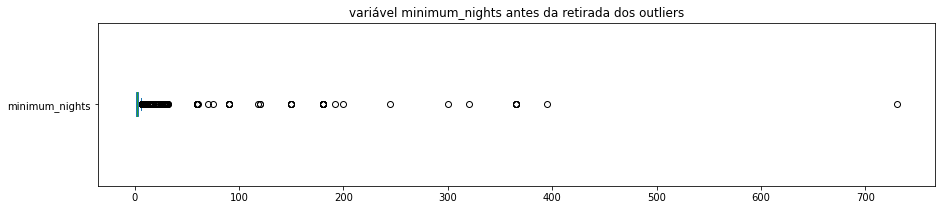

In [33]:
# variável minimum_nights antes da retirada dos outliers 
df_lisboa.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),title = "variável minimum_nights antes da retirada dos outliers")

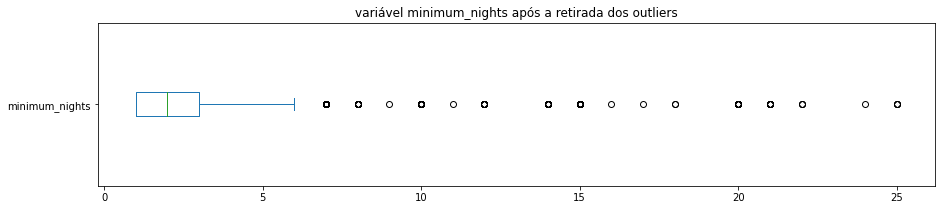

In [34]:
# variável minimum_nights após a retirada dos outliers 
df_lisboa_minimum_nights_arrumado_final.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),title = "variável minimum_nights após a retirada dos outliers")

A variável minimum_nights chama bastante a atenção pelos outliers, pois há imóveis que exigem a necessidade de grande quantidade de número mínimo de noites para aluguel, alguns exigindo mais de 300 noite de aluguel. Esses outliers foram retirados através da técnica do z-score.

#### number_of_reviews ####

Para realizar o tratamento da variável **number_of_reviews**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [35]:
#criando dataframe com as variáveis number_of_reviews e number_of_reviews_zscore
df_lisboa_number_of_reviews = pd.DataFrame(df_lisboa_numerico[['number_of_reviews',"number_of_reviews_zscore"]])

display(df_lisboa_number_of_reviews)

,number_of_reviews,number_of_reviews_zscore
1,21,-0.468299
2,37,-0.278131
3,166,1.255097
4,12,-0.575268
5,8,-0.622810
...,...,...
19644,2,-0.694123
19645,68,0.090319
19647,14,-0.551497
19649,3,-0.682238


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [36]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_number_of_reviews_arrumado_positivo = pd.DataFrame(df_lisboa_number_of_reviews.loc[df_lisboa_number_of_reviews['number_of_reviews_zscore'] > -2])
df_lisboa_number_of_reviews_arrumado_final = pd.DataFrame(df_lisboa_number_of_reviews_arrumado_positivo.loc[df_lisboa_number_of_reviews_arrumado_positivo['number_of_reviews_zscore'] < 2])

display(df_lisboa_number_of_reviews_arrumado_final)

,number_of_reviews,number_of_reviews_zscore
1,21,-0.468299
2,37,-0.278131
3,166,1.255097
4,12,-0.575268
5,8,-0.622810
...,...,...
19644,2,-0.694123
19645,68,0.090319
19647,14,-0.551497
19649,3,-0.682238


Verificando o gráfico de bloxpot da variável `number_of_reviews` antes e depois da retirada dos outliers.

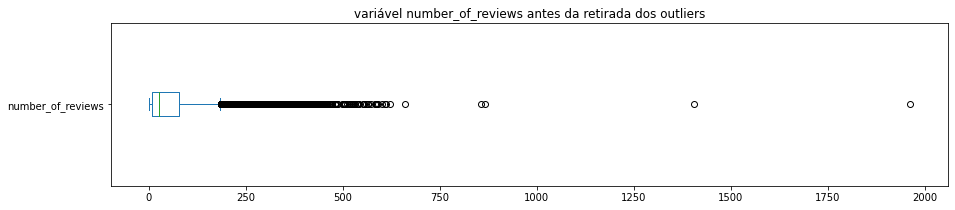

In [37]:
# variável number_of_reviews antes da retirada dos outliers 
df_lisboa.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3),title = "variável number_of_reviews antes da retirada dos outliers")

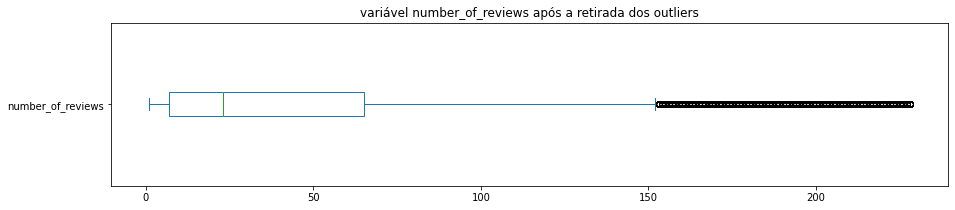

In [38]:
# variável  number_of_reviews antes da retirada dos outliers   
df_lisboa_number_of_reviews_arrumado_final.number_of_reviews.plot(kind='box', vert=False, figsize=(15, 3),title = "variável number_of_reviews após a retirada dos outliers")

#### reviews_per_month ####

Para realizar o tratamento da variável **reviews_per_month**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [39]:
#criando dataframe com as variáveis reviews_per_month e reviews_per_month_zscore
df_lisboa_reviews_per_month = pd.DataFrame(df_lisboa_numerico[['reviews_per_month',"reviews_per_month_zscore"]])

display(df_lisboa_reviews_per_month)

,reviews_per_month,reviews_per_month_zscore
1,0.56,-0.649671
2,0.89,-0.434550
3,1.62,0.041322
4,0.27,-0.838716
5,2.14,0.380300
...,...,...
19644,0.09,-0.956054
19645,1.24,-0.206392
19647,0.38,-0.767009
19649,0.60,-0.623595


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [40]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_reviews_per_month_arrumado_positivo = pd.DataFrame(df_lisboa_reviews_per_month.loc[df_lisboa_reviews_per_month['reviews_per_month_zscore'] > -2])
df_lisboa_reviews_per_month_arrumado_final = pd.DataFrame(df_lisboa_reviews_per_month_arrumado_positivo.loc[df_lisboa_reviews_per_month_arrumado_positivo['reviews_per_month_zscore'] < 2])

display(df_lisboa_reviews_per_month_arrumado_final)

,reviews_per_month,reviews_per_month_zscore
1,0.56,-0.649671
2,0.89,-0.434550
3,1.62,0.041322
4,0.27,-0.838716
5,2.14,0.380300
...,...,...
19644,0.09,-0.956054
19645,1.24,-0.206392
19647,0.38,-0.767009
19649,0.60,-0.623595


Verificando o gráfico de bloxpot da variável `reviews_per_month` antes e depois da retirada dos outliers.

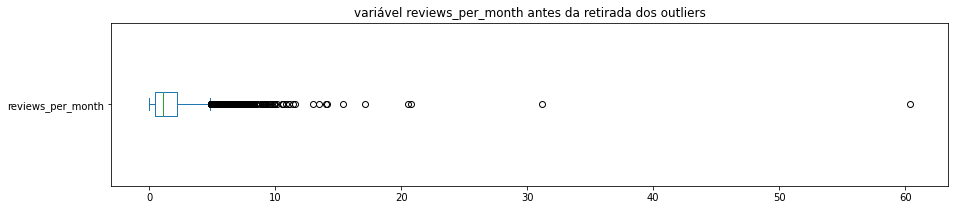

In [41]:
# variável reviews_per_month antes da retirada dos outliers  
df_lisboa.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3), title = "variável reviews_per_month antes da retirada dos outliers")

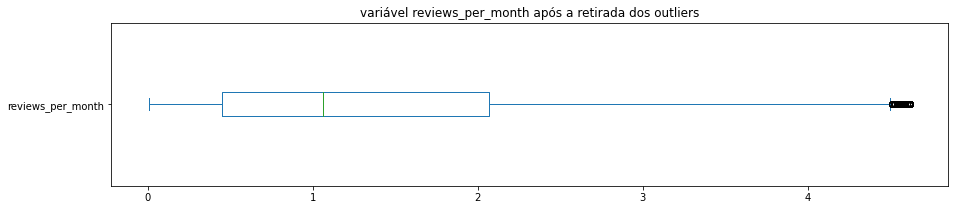

In [42]:
# variável reviews_per_month após a retirada dos outliers 
df_lisboa_reviews_per_month_arrumado_final.reviews_per_month.plot(kind='box', vert=False, figsize=(15, 3),title = "variável reviews_per_month após a retirada dos outliers")

A variável reviews_per_month possui alguns outliers bastante chamativos. Dado que um mês possui 30 ou 31 dias, e há imóveis com mais de 60 avaliações no dataset, isso aponta uma incongruência. Esses outliers foram retirados através da técnica do z-score.

#### calculated_host_listings_count ####	

Para realizar o tratamento da variável **calculated_host_listings_count**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [43]:
#criando dataframe com as variáveis calculated_host_listings_count e calculated_host_listings_count_zscore
df_lisboa_calculated_host_listings_count = pd.DataFrame(df_lisboa_numerico[['calculated_host_listings_count',"calculated_host_listings_count_zscore"]])

display(df_lisboa_calculated_host_listings_count)

,calculated_host_listings_count,calculated_host_listings_count_zscore
1,1,-0.370232
2,2,-0.346752
3,1,-0.370232
4,3,-0.323272
5,1,-0.370232
...,...,...
19644,1,-0.370232
19645,1,-0.370232
19647,3,-0.323272
19649,10,-0.158909


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [44]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_calculated_host_listings_count_arrumado_positivo = pd.DataFrame(df_lisboa_calculated_host_listings_count.loc[df_lisboa_calculated_host_listings_count['calculated_host_listings_count_zscore'] > -2])
df_lisboa_calculated_host_listings_count_arrumado_final = pd.DataFrame(df_lisboa_calculated_host_listings_count_arrumado_positivo.loc[df_lisboa_calculated_host_listings_count_arrumado_positivo['calculated_host_listings_count_zscore'] < 2])

display(df_lisboa_calculated_host_listings_count_arrumado_final)

,calculated_host_listings_count,calculated_host_listings_count_zscore
1,1,-0.370232
2,2,-0.346752
3,1,-0.370232
4,3,-0.323272
5,1,-0.370232
...,...,...
19644,1,-0.370232
19645,1,-0.370232
19647,3,-0.323272
19649,10,-0.158909


Verificando o gráfico de bloxpot da variável `calculated_host_listings_count` antes e depois da retirada dos outliers.

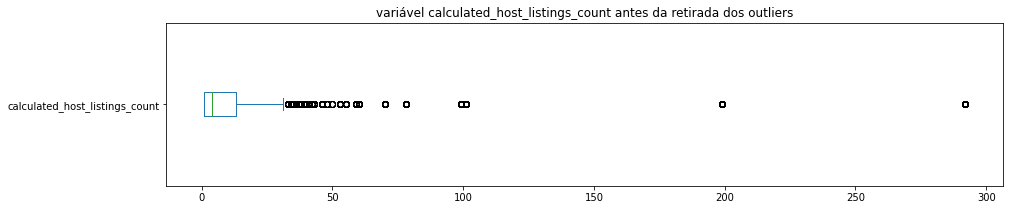

In [45]:
# variável calculated_host_listings_count antes da retirada dos outliers 
df_lisboa.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3), title = "variável calculated_host_listings_count antes da retirada dos outliers")

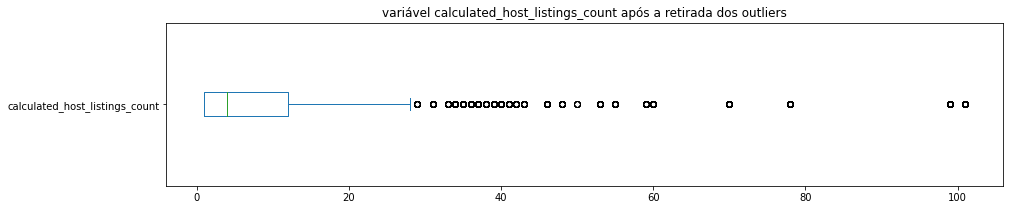

In [46]:
# variável calculated_host_listings_count após a retirada dos outliers 
df_lisboa_calculated_host_listings_count_arrumado_final.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3), title = "variável calculated_host_listings_count após a retirada dos outliers")

#### availability_365 ####   

Para realizar o tratamento da variável **availability_365**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [47]:
#criando dataframe com as variáveis availability_365 e availability_365_zscore
df_lisboa_availability_365 = pd.DataFrame(df_lisboa_numerico[['availability_365',"availability_365_zscore"]])

display(df_lisboa_availability_365)

,availability_365,availability_365_zscore
1,72,-1.141956
2,269,0.462761
3,304,0.747863
4,170,-0.343671
5,338,1.024819
...,...,...
19644,250,0.307991
19645,220,0.063618
19647,0,-1.728452
19649,364,1.236609


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [48]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_availability_365_arrumado_positivo = pd.DataFrame(df_lisboa_availability_365.loc[df_lisboa_availability_365['availability_365_zscore'] > -2])
df_lisboa_availability_365_arrumado_final = pd.DataFrame(df_lisboa_availability_365_arrumado_positivo.loc[df_lisboa_availability_365_arrumado_positivo['availability_365_zscore'] < 2])

display(df_lisboa_availability_365_arrumado_final)

,availability_365,availability_365_zscore
1,72,-1.141956
2,269,0.462761
3,304,0.747863
4,170,-0.343671
5,338,1.024819
...,...,...
19644,250,0.307991
19645,220,0.063618
19647,0,-1.728452
19649,364,1.236609


Verificando o gráfico de bloxpot da variável `availability_365` antes e depois da retirada dos outliers.

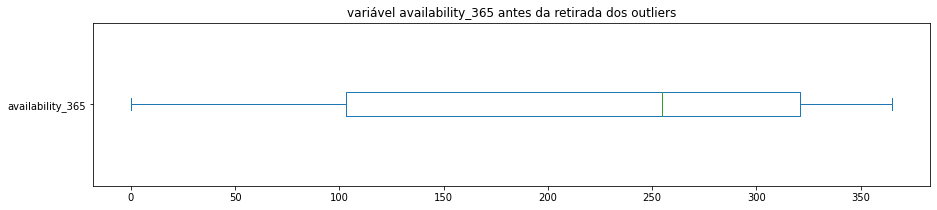

In [49]:
# variável availability_365 antes da retirada dos outliers 
df_lisboa.availability_365.plot(kind='box', vert=False, figsize=(15, 3), title = "variável availability_365 antes da retirada dos outliers")

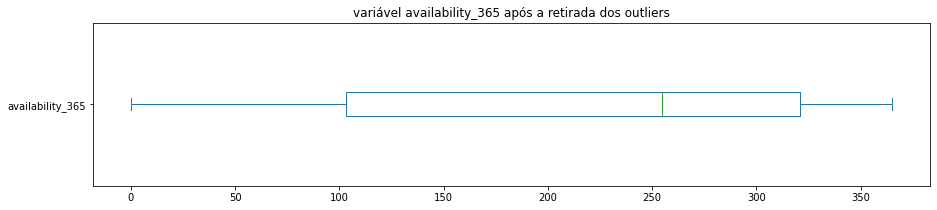

In [50]:
# variável availability_365 após a retirada dos outliers 
df_lisboa_availability_365_arrumado_final.availability_365.plot(kind='box', vert=False, figsize=(15, 3), title = "variável availability_365 após a retirada dos outliers")

#### number_of_reviews_ltm ####  

Para realizar o tratamento da variável **number_of_reviews_ltm**, será feito primeiramente um dataframe exclusivo para essa variável a partir do dataframe com os z-scores calculados:

In [51]:
#criando dataframe com as variáveis number_of_reviews_ltm e number_of_reviews_ltm_zscore
df_lisboa_number_of_reviews_ltm = pd.DataFrame(df_lisboa_numerico[['number_of_reviews_ltm',"number_of_reviews_ltm_zscore"]])

display(df_lisboa_number_of_reviews_ltm)

,number_of_reviews_ltm,number_of_reviews_ltm_zscore
1,8,-0.43041
2,16,-0.02089
3,45,1.46362
4,5,-0.58398
5,8,-0.43041
...,...,...
19644,1,-0.78874
19645,22,0.28625
19647,7,-0.48160
19649,3,-0.68636


Criando o dataframe com os z-scores somente entre o intervalo de -2 e 2:

In [52]:
#criando o dataframe já com os z-scores somente entre o intervalo de -2 e 2

df_lisboa_number_of_reviews_ltm_arrumado_positivo = pd.DataFrame(df_lisboa_number_of_reviews_ltm.loc[df_lisboa_number_of_reviews_ltm['number_of_reviews_ltm_zscore'] > -2])
df_lisboa_number_of_reviews_ltm_arrumado_final = pd.DataFrame(df_lisboa_number_of_reviews_ltm_arrumado_positivo.loc[df_lisboa_number_of_reviews_ltm_arrumado_positivo['number_of_reviews_ltm_zscore'] < 2])

display(df_lisboa_number_of_reviews_ltm_arrumado_final)

,number_of_reviews_ltm,number_of_reviews_ltm_zscore
1,8,-0.43041
2,16,-0.02089
3,45,1.46362
4,5,-0.58398
5,8,-0.43041
...,...,...
19644,1,-0.78874
19645,22,0.28625
19647,7,-0.48160
19649,3,-0.68636


Verificando o gráfico de bloxpot da variável `number_of_reviews_ltm` antes e depois da retirada dos outliers.

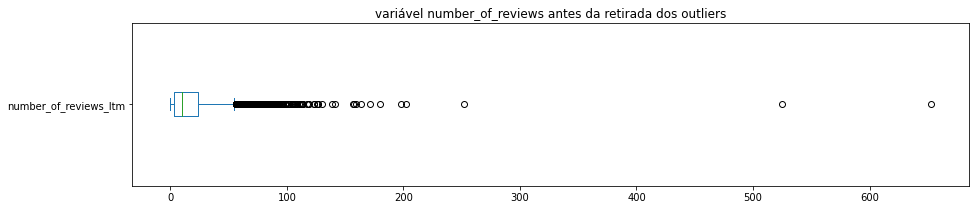

In [53]:
# variável number_of_reviews_ltm antes da retirada dos outliers 
df_lisboa.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3), title = "variável number_of_reviews antes da retirada dos outliers")

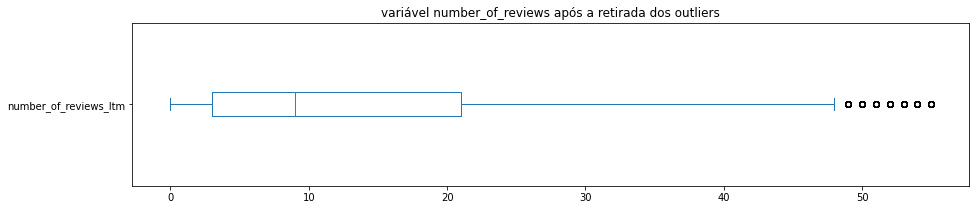

In [54]:
# variável number_of_reviews_ltm após a retirada dos outliers 
df_lisboa_number_of_reviews_ltm_arrumado_final.number_of_reviews_ltm.plot(kind='box', vert=False, figsize=(15, 3), title = "variável number_of_reviews após a retirada dos outliers")

## Análise dos dados ##

Com os dados tratados, já retirados os valores ausentes e os outliers, inicia-se a análise dos dados que permitirá tirar conclusões das hospedagens do aplicativo AIRBNB na cidade de lisboa.

Os seguintes tópicos serão tratados nessa análise:
* Média do preço de aluguel diário;
* Média mínima de noites para aluguel dos imóveis;
* Tipo de imóvel com maior disponibilidade para alugar;
* Bairro mais caro;
* Bairro mais barato;
* Correlação das variáveis.


### Média do preço de aluguel diário ###



In [55]:
#ver a média de preços do aluguel através coluna price já tratada

print(f'A média dos preços de aluguel dos imóveis do AIRBNB em Lisboa é: {df_lisboa_price_arrumado_final.price.mean()} €')

A média dos preços de aluguel dos imóveis do AIRBNB em Lisboa é: 121.17109777015438 €


### Média mínima de noites para aluguel dos imóveis ###

In [56]:
#ver a média mínima de noites para alugar o imóvel através da coluna minimum_nights já tratada

print(f'A média mínima de noite para alugar um imóvel em Lisboa do AIRBNB é {df_lisboa_minimum_nights_arrumado_final.minimum_nights.mean()} noites')

A média mínima de noite para alugar um imóvel em Lisboa do AIRBNB é 2.5804311774461026 noites


### Tipo de imóvel com maior disponibilidade para alugar ###

In [57]:
#ver o tipo de imóvel mais disponível para aluguel em Lisboa através da coluna room_type

df_lisboa.room_type.value_counts()

Entire home/apt    13056
Private room        3101
Shared room          174
Hotel room           168
Name: room_type, dtype: int64

O tipo de imóvel que possui mais disponibilidade para aluguel em Lisboa é casa completa ou apartamento, com cerca de 80% dos imóveis disponíveis.

### Bairro mais caro ###

Para encontrar o bairro com o valor médio mais alto de aluguel de imóveis na plataforma AIRBNB, primeiramente foram juntados todos os dataframes numéricos, com a adição dos valores de z-score calculados:

In [58]:
# Definindo a lista de dataframes a serem juntados, os numéricos tratados e também o de variáveis string
dataframes_to_join = [
    df_lisboa_price_arrumado_final, 
    df_lisboa_minimum_nights_arrumado_final, 
    df_lisboa_number_of_reviews_arrumado_final, 
    df_lisboa_reviews_per_month_arrumado_final, 
    df_lisboa_calculated_host_listings_count_arrumado_final, 
    df_lisboa_availability_365_arrumado_final, 
    df_lisboa_number_of_reviews_ltm_arrumado_final, 
    df_lisboa_string
]

# Define o primeiro dataframe como o dataframe_final
dataframe_final_7 = dataframes_to_join[0]

# Loop para juntar os dataframes restantes na variável dataframe_final
for i in range(1, len(dataframes_to_join)):
    dataframe_final_7 = dataframe_final_7.join(dataframes_to_join[i])

# Exibe o resultado final na tela
display(dataframe_final_7)

,price,price_zscore,minimum_nights,minimum_nights_zscore,number_of_reviews,number_of_reviews_zscore,reviews_per_month,reviews_per_month_zscore,calculated_host_listings_count,calculated_host_listings_count_zscore,...,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
1,95,-0.162541,2.0,-0.112465,21.0,-0.468299,0.56,-0.649671,1.0,-0.370232,...,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,2022-09-03,42622/AL
2,65,-0.295853,5.0,0.139056,37.0,-0.278131,0.89,-0.434550,2.0,-0.346752,...,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,2022-08-18,Exempt
3,54,-0.344734,2.0,-0.112465,166.0,1.255097,1.62,0.041322,1.0,-0.370232,...,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,2022-09-11,56539/AL.
4,59,-0.322515,3.0,-0.028624,12.0,-0.575268,0.27,-0.838716,3.0,-0.323272,...,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,2022-08-29,84329/AL
5,25,-0.473602,1.0,-0.196305,8.0,-0.622810,2.14,0.380300,1.0,-0.370232,...,La Caz O Soleil de Lapa (sans cuisine),22145635,Christine,Azambuja,Aveiras de Cima,39.165900,-8.884790,Private room,2022-08-31,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,70,-0.273634,2.0,-0.112465,2.0,-0.694123,0.09,-0.956054,1.0,-0.370232,...,Quarto com acesso à sala no centro de Almada,85446248,Sandra,Lisboa,Estrela,38.676530,-9.164220,Private room,2022-08-16,Exempt
19645,90,-0.184760,2.0,-0.112465,68.0,0.090319,1.24,-0.206392,1.0,-0.370232,...,Apartamento Tejo,170117548,Manuela,Lisboa,Estrela,38.685380,-9.150210,Entire home/apt,2022-08-27,63358/AL
19647,146,0.064089,2.0,-0.112465,14.0,-0.551497,0.38,-0.767009,3.0,-0.323272,...,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,2022-09-01,43425/AL
19649,180,0.215176,1.0,-0.196305,3.0,-0.682238,0.60,-0.623595,10.0,-0.158909,...,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,2022-08-16,16046/AL


In [59]:
#encontrando o valor médio de aluguel dos bairros da cidade de Lisboa que constam no aplicativo AirBNB
dataframe_final_7.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)

neighbourhood
Vila Franca de Xira                                 44.130435
Ramalhal                                            45.857143
Santa Iria de Azoia, So Joo da Talha e Bobadela     46.684211
Malveira e So Miguel de Alcaina                     50.500000
Camarate, Unhos e Apelao                            51.777778
                                                      ...    
Freiria                                            205.500000
Vale do Paraso                                     260.000000
Aveiras de Baixo                                   280.000000
Alverca do Ribatejo e Sobralinho                   300.000000
Cardosas                                           306.000000
Name: price, Length: 125, dtype: float64

In [60]:
#juntando em um único DataSet todas as variáveis numéricas após a exclusão do Z-Score maior que 2 e menor que -2

df_lisboa_concat_limpo = pd.DataFrame(dataframe_final_7.loc[(dataframe_final_7['price_zscore'] > -2) & (dataframe_final_7['price_zscore'] < 2) &
                                                          (dataframe_final_7['minimum_nights_zscore'] > -2) & (dataframe_final_7['minimum_nights_zscore'] < 2) &
                                                          (dataframe_final_7['number_of_reviews_zscore'] > -2) & (dataframe_final_7['number_of_reviews_zscore'] < 2) &
                                                          (dataframe_final_7['reviews_per_month_zscore'] > -2) & (dataframe_final_7['reviews_per_month_zscore'] < 2) &
                                                          (dataframe_final_7['calculated_host_listings_count_zscore'] > -2) & (dataframe_final_7['calculated_host_listings_count_zscore'] < 2) &
                                                          (dataframe_final_7['availability_365_zscore'] > -2) & (dataframe_final_7['availability_365_zscore'] < 2) &
                                                          (dataframe_final_7['number_of_reviews_ltm_zscore'] > -2) & (dataframe_final_7['number_of_reviews_ltm_zscore'] < 2)



                                                                                                                                                                          ])

display (df_lisboa_concat_limpo)

,price,price_zscore,minimum_nights,minimum_nights_zscore,number_of_reviews,number_of_reviews_zscore,reviews_per_month,reviews_per_month_zscore,calculated_host_listings_count,calculated_host_listings_count_zscore,...,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
1,95,-0.162541,2.0,-0.112465,21.0,-0.468299,0.56,-0.649671,1.0,-0.370232,...,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,2022-09-03,42622/AL
2,65,-0.295853,5.0,0.139056,37.0,-0.278131,0.89,-0.434550,2.0,-0.346752,...,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,2022-08-18,Exempt
3,54,-0.344734,2.0,-0.112465,166.0,1.255097,1.62,0.041322,1.0,-0.370232,...,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,2022-09-11,56539/AL.
4,59,-0.322515,3.0,-0.028624,12.0,-0.575268,0.27,-0.838716,3.0,-0.323272,...,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,2022-08-29,84329/AL
5,25,-0.473602,1.0,-0.196305,8.0,-0.622810,2.14,0.380300,1.0,-0.370232,...,La Caz O Soleil de Lapa (sans cuisine),22145635,Christine,Azambuja,Aveiras de Cima,39.165900,-8.884790,Private room,2022-08-31,Exempt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,70,-0.273634,2.0,-0.112465,2.0,-0.694123,0.09,-0.956054,1.0,-0.370232,...,Quarto com acesso à sala no centro de Almada,85446248,Sandra,Lisboa,Estrela,38.676530,-9.164220,Private room,2022-08-16,Exempt
19645,90,-0.184760,2.0,-0.112465,68.0,0.090319,1.24,-0.206392,1.0,-0.370232,...,Apartamento Tejo,170117548,Manuela,Lisboa,Estrela,38.685380,-9.150210,Entire home/apt,2022-08-27,63358/AL
19647,146,0.064089,2.0,-0.112465,14.0,-0.551497,0.38,-0.767009,3.0,-0.323272,...,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,2022-09-01,43425/AL
19649,180,0.215176,1.0,-0.196305,3.0,-0.682238,0.60,-0.623595,10.0,-0.158909,...,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,2022-08-16,16046/AL


In [61]:
#criando o dataframe sem os z-score calculados
df_lisboa_concat_limpo_sem_score = df_lisboa_concat_limpo.drop(["price_zscore", "minimum_nights_zscore", "number_of_reviews_zscore", "reviews_per_month_zscore", "calculated_host_listings_count_zscore", 
                                                                "availability_365_zscore", "number_of_reviews_ltm_zscore", "name", "host_id", "host_name", "neighbourhood_group", "neighbourhood",
                                                                "latitude", "longitude", "room_type", "last_review", "license"], axis=1)

display(df_lisboa_concat_limpo_sem_score)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
1,95,2.0,21.0,0.56,1.0,72,8.0
2,65,5.0,37.0,0.89,2.0,269,16.0
3,54,2.0,166.0,1.62,1.0,304,45.0
4,59,3.0,12.0,0.27,3.0,170,5.0
5,25,1.0,8.0,2.14,1.0,338,8.0
...,...,...,...,...,...,...,...
19644,70,2.0,2.0,0.09,1.0,250,1.0
19645,90,2.0,68.0,1.24,1.0,220,22.0
19647,146,2.0,14.0,0.38,3.0,0,7.0
19649,180,1.0,3.0,0.60,10.0,364,3.0


In [63]:
#encontrando o valor médio de aluguel dos bairros da cidade de Lisboa que constam no aplicativo AirBNB
df_lisboa_concat_limpo.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)

neighbourhood
Vila Franca de Xira                                 45.000000
Encosta do Sol                                      45.333333
Ramalhal                                            45.857143
Alfragide                                           46.000000
Santa Iria de Azoia, So Joo da Talha e Bobadela     46.684211
                                                      ...    
Freiria                                            205.500000
Vale do Paraso                                     260.000000
Aveiras de Baixo                                   280.000000
Alverca do Ribatejo e Sobralinho                   300.000000
Cardosas                                           306.000000
Name: price, Length: 125, dtype: float64

Muitos dos bairros listados acima como os mais caros, possuem somente um imóvel disponível para ser alugado no aplicativo. Isso prejudica a análise, pois não temos a variabilidade necessária para afirmar que a média de preço daquele bairro é realmente aquela. De forma a contorna esse problema, foram retirados das análises os bairros que possuem 5 ou menos imóveis para alugar na cidade de Lisboa no aplicativo AirBNB. Para isso, primeiro foi realizado o levantamento de quantos imóveis haviam disponíveis para alugar em cada bairro, sendo para isto criado um dataset:

In [64]:
#Criando o Array com o número de imóveis por bairro de Lisboa
array_bairros_lisboa = df_lisboa_concat_limpo.neighbourhood.value_counts()

#criando um dataframe só com os dados dos imóveis de Lisboa
df_bairros_lisboa = pd.DataFrame(array_bairros_lisboa)

display(df_bairros_lisboa)

,neighbourhood
Santa Maria Maior,2104
Misericrdia,1579
Arroios,1239
Cascais e Estoril,1012
So Vicente,765
...,...
Cardosas,1
Vialonga,1
Carnota,1
Porto Salvo,1


In [65]:
#Criando um dataset somente com os bairros que possuem mais de 5 imóveis sendo anunciados no aplicativo AirBNB
df_bairros_lisboa_povoados_maior = df_bairros_lisboa.loc[df_bairros_lisboa["neighbourhood"]>5]

display(df_bairros_lisboa_povoados_maior)

,neighbourhood
Santa Maria Maior,2104
Misericrdia,1579
Arroios,1239
Cascais e Estoril,1012
So Vicente,765
...,...
Maxial e Monte Redondo,6
Santo Anto e So Julio do Tojal,6
Dois Portos e Runa,6
Ribafria e Pereiro de Palhacana,6


Criando um dataset para listar os bairros com 5 imóveis ou menos sendo anunciado no AirBNB:

In [66]:
#Criando um dataset somente com os bairros que possuem 5 imóveis ou menos sendo anunciados no aplicativo AirBNB
df_bairros_lisboa_povoados_menor = df_bairros_lisboa.loc[df_bairros_lisboa["neighbourhood"]<=5]

display(df_bairros_lisboa_povoados_menor)

,neighbourhood
Santo Antnio dos Cavaleiros e Frielas,5
Bucelas,5
Aveiras de Cima,5
Turcifal,4
Moita dos Ferreiros,4
Sapataria,4
Carregado e Cadafais,4
"Alhandra, So Joo dos Montes e Calhandriz",4
Pvoa de Santa Iria e Forte da Casa,4
Campelos e Outeiro da Cabea,4


In [67]:
#este código cria uma lista com os bairros que possuem 5 ou menos imóveis sendo anunciados no AirBNB, e cria uma lista de STRINGS, que será usado no loop de repetição depois
# esses imóveis do dataset.
saida_ida_menor = list(df_bairros_lisboa_povoados_menor.index.unique())

display(saida_ida_menor)

['Santo Antnio dos Cavaleiros e Frielas',
 'Bucelas',
 'Aveiras de Cima',
 'Turcifal',
 'Moita dos Ferreiros',
 'Sapataria',
 'Carregado e Cadafais',
 'Alhandra, So Joo dos Montes e Calhandriz',
 'Pvoa de Santa Iria e Forte da Casa',
 'Campelos e Outeiro da Cabea',
 'Carvoeira e Carmes',
 'Vermelha',
 'Miragaia e Marteleira',
 'Ventosa',
 'Sobral de Monte Agrao',
 'Peral',
 'Azueira e Sobral da Abelheira',
 'Santiago dos Velhos',
 'Alfragide',
 'Aveiras de Baixo',
 'Freiria',
 'Azambuja',
 'Vimeiro',
 'Arruda dos Vinhos',
 'Aldeia Galega da Merceana e Aldeia Gavinha',
 'Lousa',
 'Malveira e So Miguel de Alcaina',
 'Painho e Figueiros',
 'Alverca do Ribatejo e Sobralinho',
 'Vale do Paraso',
 'Meca',
 'Alcoentre',
 'Cardosas',
 'Vialonga',
 'Carnota',
 'Porto Salvo',
 'Ponte do Rol']

Para encontrar o bairro com maior valor médio de aluguel, basta agora retirar do dataset os bairros selecionados que contem 5 ou menos pontos de locação na base dados, e criar um novo dataset a partir disso. Esta ação está feita no código a seguir:

In [70]:
#filtrando do dataset os bairros que possuem 5 imóveis ou menos sendo anunciados na cidade de Lisboa no aplicativo AirBNB

df_final_inal = df_lisboa_concat_limpo
df_final_inal_1 = df_final_inal[df_final_inal["neighbourhood"].str.contains('Santo Antnio dos Cavaleiros e Frielas') == False]
df_final_inal_2 = df_final_inal_1[df_final_inal_1["neighbourhood"].str.contains('Bucelas') == False]
df_final_inal_3 = df_final_inal_2[df_final_inal_2["neighbourhood"].str.contains('Aveiras de Cima') == False]
df_final_inal_4 = df_final_inal_3[df_final_inal_3["neighbourhood"].str.contains('Turcifal') == False]

df_final_inal_5 = df_final_inal_4[df_final_inal_4["neighbourhood"].str.contains('Moita dos Ferreiros') == False]
df_final_inal_6 = df_final_inal_5[df_final_inal_5["neighbourhood"].str.contains('Sapataria') == False]
df_final_inal_7 = df_final_inal_6[df_final_inal_6["neighbourhood"].str.contains('Carregado e Cadafais') == False]

df_final_inal_8 = df_final_inal_7[df_final_inal_7["neighbourhood"].str.contains('Alhandra, So Joo dos Montes e Calhandriz') == False]
df_final_inal_9 = df_final_inal_8[df_final_inal_8["neighbourhood"].str.contains('Pvoa de Santa Iria e Forte da Casa') == False]
df_final_inal_10 = df_final_inal_9[df_final_inal_9["neighbourhood"].str.contains('Campelos e Outeiro da Cabea') == False]


df_final_inal_11 = df_final_inal_10[df_final_inal_10["neighbourhood"].str.contains('Carvoeira e Carmes') == False]
df_final_inal_12 = df_final_inal_11[df_final_inal_11["neighbourhood"].str.contains('Vermelha') == False]
df_final_inal_13 = df_final_inal_12[df_final_inal_12["neighbourhood"].str.contains('Miragaia e Marteleira') == False]

df_final_inal_14 = df_final_inal_13[df_final_inal_13["neighbourhood"].str.contains('Ventosa') == False]
df_final_inal_15 = df_final_inal_14[df_final_inal_14["neighbourhood"].str.contains('Sobral de Monte Agrao') == False]
df_final_inal_16 = df_final_inal_15[df_final_inal_15["neighbourhood"].str.contains('Peral') == False]

df_final_inal_17 = df_final_inal_16[df_final_inal_16["neighbourhood"].str.contains('Azueira e Sobral da Abelheira') == False]
df_final_inal_18 = df_final_inal_17[df_final_inal_17["neighbourhood"].str.contains('Santiago dos Velhos') == False]

df_final_inal_19 = df_final_inal_18[df_final_inal_18["neighbourhood"].str.contains('Alfragide') == False]
df_final_inal_20 = df_final_inal_19[df_final_inal_19["neighbourhood"].str.contains('Aveiras de Baixo') == False]
df_final_inal_21 = df_final_inal_20[df_final_inal_20["neighbourhood"].str.contains('Freiria') == False]

df_final_inal_22 = df_final_inal_21[df_final_inal_21["neighbourhood"].str.contains('Azambuja') == False]
df_final_inal_23 = df_final_inal_22[df_final_inal_22["neighbourhood"].str.contains('Vimeiro') == False]
df_final_inal_24 = df_final_inal_23[df_final_inal_23["neighbourhood"].str.contains('Arruda dos Vinhos') == False]

df_final_inal_25 = df_final_inal_24[df_final_inal_24["neighbourhood"].str.contains('Malveira e So Miguel de Alcaina') == False]
df_final_inal_26 = df_final_inal_25[df_final_inal_25["neighbourhood"].str.contains('Lousa') == False]
df_final_inal_27 = df_final_inal_26[df_final_inal_26["neighbourhood"].str.contains('Painho e Figueiros') == False]


df_final_inal_28 = df_final_inal_27[df_final_inal_27["neighbourhood"].str.contains('Alverca do Ribatejo e Sobralinho') == False]
df_final_inal_29 = df_final_inal_28[df_final_inal_28["neighbourhood"].str.contains('Vale do Paraso') == False]
df_final_inal_30 = df_final_inal_29[df_final_inal_29["neighbourhood"].str.contains('Meca') == False]

df_final_inal_31 = df_final_inal_30[df_final_inal_30["neighbourhood"].str.contains('Alcoentre') == False]
df_final_inal_32 = df_final_inal_31[df_final_inal_31["neighbourhood"].str.contains('Cardosas') == False]
df_final_inal_33 = df_final_inal_32[df_final_inal_32["neighbourhood"].str.contains('Vialonga') == False]

df_final_inal_34 = df_final_inal_33[df_final_inal_33["neighbourhood"].str.contains('Carnota') == False]
df_final_inal_35 = df_final_inal_34[df_final_inal_34["neighbourhood"].str.contains('Porto Salvo') == False]
df_final_inal_36 = df_final_inal_35[df_final_inal_35["neighbourhood"].str.contains('Ponte do Rol') == False]
df_final_inal_37 = df_final_inal_36[df_final_inal_36["neighbourhood"].str.contains('Aldeia Galega da Merceana e Aldeia Gavinha') == False]

display(df_final_inal_37)

,price,price_zscore,minimum_nights,minimum_nights_zscore,number_of_reviews,number_of_reviews_zscore,reviews_per_month,reviews_per_month_zscore,calculated_host_listings_count,calculated_host_listings_count_zscore,...,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
1,95,-0.162541,2.0,-0.112465,21.0,-0.468299,0.56,-0.649671,1.0,-0.370232,...,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,2022-09-03,42622/AL
2,65,-0.295853,5.0,0.139056,37.0,-0.278131,0.89,-0.434550,2.0,-0.346752,...,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,2022-08-18,Exempt
3,54,-0.344734,2.0,-0.112465,166.0,1.255097,1.62,0.041322,1.0,-0.370232,...,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,2022-09-11,56539/AL.
4,59,-0.322515,3.0,-0.028624,12.0,-0.575268,0.27,-0.838716,3.0,-0.323272,...,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,2022-08-29,84329/AL
7,14,-0.522483,3.0,-0.028624,12.0,-0.575268,1.23,-0.212911,4.0,-0.299791,...,New Inn Cacilhas - Shared Comfort Bed#2,78069703,Joana,Lisboa,Estrela,38.683580,-9.152590,Shared room,2022-08-24,107023/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,70,-0.273634,2.0,-0.112465,2.0,-0.694123,0.09,-0.956054,1.0,-0.370232,...,Quarto com acesso à sala no centro de Almada,85446248,Sandra,Lisboa,Estrela,38.676530,-9.164220,Private room,2022-08-16,Exempt
19645,90,-0.184760,2.0,-0.112465,68.0,0.090319,1.24,-0.206392,1.0,-0.370232,...,Apartamento Tejo,170117548,Manuela,Lisboa,Estrela,38.685380,-9.150210,Entire home/apt,2022-08-27,63358/AL
19647,146,0.064089,2.0,-0.112465,14.0,-0.551497,0.38,-0.767009,3.0,-0.323272,...,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,2022-09-01,43425/AL
19649,180,0.215176,1.0,-0.196305,3.0,-0.682238,0.60,-0.623595,10.0,-0.158909,...,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,2022-08-16,16046/AL


In [71]:
#utilizando o CHATGPT, obtendo o mesmo código com uma condição de loop

neighbourhoods_to_remove = ['Santo Antnio dos Cavaleiros e Frielas', 'Bucelas', 'Aveiras de Cima', 'Turcifal', 'Moita dos Ferreiros', 
                            'Sapataria', 'Carregado e Cadafais', 'Alhandra, So Joo dos Montes e Calhandriz', 
                            'Pvoa de Santa Iria e Forte da Casa', 'Campelos e Outeiro da Cabea', 'Carvoeira e Carmes', 'Vermelha', 
                            'Miragaia e Marteleira', 'Ventosa', 'Sobral de Monte Agrao', 'Peral', 'Azueira e Sobral da Abelheira', 
                            'Santiago dos Velhos', 'Alfragide', 'Aveiras de Baixo', 'Freiria']

df_final = df_lisboa_concat_limpo
for neighbourhood in neighbourhoods_to_remove:
    df_final_novo = df_final[df_final["neighbourhood"].str.contains(neighbourhood) == False]

display(df_final_inal_37)

,price,price_zscore,minimum_nights,minimum_nights_zscore,number_of_reviews,number_of_reviews_zscore,reviews_per_month,reviews_per_month_zscore,calculated_host_listings_count,calculated_host_listings_count_zscore,...,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,last_review,license
1,95,-0.162541,2.0,-0.112465,21.0,-0.468299,0.56,-0.649671,1.0,-0.370232,...,Casa Ferry Holiday House Lisbon 15min & Beach ...,275575455,Joana,Lisboa,Belm,38.671280,-9.230640,Entire home/apt,2022-09-03,42622/AL
2,65,-0.295853,5.0,0.139056,37.0,-0.278131,0.89,-0.434550,2.0,-0.346752,...,"La maison de la plage, et de la tranquillité",175971197,Ramiro,Lourinh,Lourinh e Atalaia,39.306640,-9.337600,Entire home/apt,2022-08-18,Exempt
3,54,-0.344734,2.0,-0.112465,166.0,1.255097,1.62,0.041322,1.0,-0.370232,...,Heart of Alfama Lisbon Center - Cœur de l'Alfama,107347,Ellie,Lisboa,Santa Maria Maior,38.712410,-9.127060,Entire home/apt,2022-09-11,56539/AL.
4,59,-0.322515,3.0,-0.028624,12.0,-0.575268,0.27,-0.838716,3.0,-0.323272,...,Apartamento no Coração da Aldeia/ Flat to Rent,213594711,Jorge,Lourinh,Lourinh e Atalaia,39.308548,-9.338993,Entire home/apt,2022-08-29,84329/AL
7,14,-0.522483,3.0,-0.028624,12.0,-0.575268,1.23,-0.212911,4.0,-0.299791,...,New Inn Cacilhas - Shared Comfort Bed#2,78069703,Joana,Lisboa,Estrela,38.683580,-9.152590,Shared room,2022-08-24,107023/AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19644,70,-0.273634,2.0,-0.112465,2.0,-0.694123,0.09,-0.956054,1.0,-0.370232,...,Quarto com acesso à sala no centro de Almada,85446248,Sandra,Lisboa,Estrela,38.676530,-9.164220,Private room,2022-08-16,Exempt
19645,90,-0.184760,2.0,-0.112465,68.0,0.090319,1.24,-0.206392,1.0,-0.370232,...,Apartamento Tejo,170117548,Manuela,Lisboa,Estrela,38.685380,-9.150210,Entire home/apt,2022-08-27,63358/AL
19647,146,0.064089,2.0,-0.112465,14.0,-0.551497,0.38,-0.767009,3.0,-0.323272,...,Lisbon South Bay - Main Avenue - Self Check-in,65779811,Aida,Lisboa,Estrela,38.680040,-9.154540,Entire home/apt,2022-09-01,43425/AL
19649,180,0.215176,1.0,-0.196305,3.0,-0.682238,0.60,-0.623595,10.0,-0.158909,...,A private room for groups or family!,432118638,Mykyta,Lisboa,Belm,38.672380,-9.232960,Private room,2022-08-16,16046/AL


A saída do código acima é justamente os dataset já excluindo os bairros com menos de 6 pontos de locação no AirBNB. Para conferir se essa condição foi realmente satisfeita, o código abaixo tem como função determinar o array do número de casas para locação em cada vizinhança, se na saída todos os bairros tiverem um número maior que 5, é porque o dataset criado satisfez suas condições.

In [72]:
#Criando o Array com o número de imóveis por bairro de Lisboa
array_bairros_lisboa_final_inal = df_final_inal_37.neighbourhood.value_counts()

#criando um dataframe só com os dados nulos de lisboa
df_bairros_lisboa_final_inal_nal = pd.DataFrame(array_bairros_lisboa_final_inal)

display(df_bairros_lisboa_final_inal_nal)

,neighbourhood
Santa Maria Maior,2104
Misericrdia,1579
Arroios,1239
Cascais e Estoril,1012
So Vicente,765
...,...
Maxial e Monte Redondo,6
Dois Portos e Runa,6
Abrigada e Cabanas de Torres,6
Ribafria e Pereiro de Palhacana,6


Como no código acima todos os números de locação por bairro são maiores do que 5, isso indica que a nossa intenção de excluir os bairros com baixa amostragem do dataset foi concluida. Para encontrar o bairro com valor médio mais alto para locação na plataforma AirBNB em Lisboa, basta agora ordenarmos os bairros de acordo com o valor médio de locação:

In [76]:
#mostrar o imóvel mais caro do dataset original
df_final_inal_37.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Ribamar                                            202.000000
Santa Brbara                                       177.954545
Colares                                            168.699248
Parque das Naes                                    151.427083
Cascais e Estoril                                  149.276680
                                                      ...    
Camarate, Unhos e Apelao                            50.875000
Santa Iria de Azoia, So Joo da Talha e Bobadela     46.684211
Ramalhal                                            45.857143
Encosta do Sol                                      45.333333
Vila Franca de Xira                                 45.000000
Name: price, Length: 88, dtype: float64

Do código mostrado acima, que classifica os bairros de acordo com a média de preço do aluguel, do maior para o menor, podemos concluir que o bairro com o mais alto valor médio de aluguel é o bairro **Ribamar**.

### Bairro mais barato ###

Para encontrar o bairro com valor médio mais alto para locação na plataforma AirBNB em Lisboa, basta agora ordenarmos os bairros de acordo com o valor médio de locação, utilizando o mesmo dataset já tratado e que exclui os bairros com baixa amostragem:

In [73]:
#mostrar o imóvel mais barato do dataset original
df_final_inal_37.groupby(['neighbourhood']).price.mean().sort_values(ascending=True)

neighbourhood
Vila Franca de Xira                                 45.000000
Encosta do Sol                                      45.333333
Ramalhal                                            45.857143
Santa Iria de Azoia, So Joo da Talha e Bobadela     46.684211
Camarate, Unhos e Apelao                            50.875000
                                                      ...    
Cascais e Estoril                                  149.276680
Parque das Naes                                    151.427083
Colares                                            168.699248
Santa Brbara                                       177.954545
Ribamar                                            202.000000
Name: price, Length: 88, dtype: float64

Do código mostrado acima, que classifica os bairros de acordo com a média de preço do aluguel, do menor para o maior, podemos concluir que o bairro com o mais baixo valor médio de aluguel é o bairro **Vila Franca de Xira**.

### Correlação das variáveis ###

Para finalizar a análise dos dados dos imóveis da cidade de Lisboa disponibilizados no aplicativo AirBNB, será feito um gráfico de correlação das variáveis que constam no Dataset. O coeficiente de correlação mede o grau de associação entre duas variáveis, e quanto mais próximo de 1 o valor do coeficiente calculado, maior é a associação entre as variáveis. É importante destacar que correlação não indica causalidade.

In [74]:
corr = df_lisboa[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.004407,-0.038451,-0.045126,0.031028,0.030997
minimum_nights,-0.004407,1.000000,-0.028764,-0.064601,-0.034186,-0.036395
number_of_reviews,-0.038451,-0.028764,1.000000,0.537822,-0.090353,0.013990
reviews_per_month,-0.045126,-0.064601,0.537822,1.000000,-0.057218,0.109550
calculated_host_listings_count,0.031028,-0.034186,-0.090353,-0.057218,1.000000,0.066835
availability_365,0.030997,-0.036395,0.013990,0.109550,0.066835,1.000000


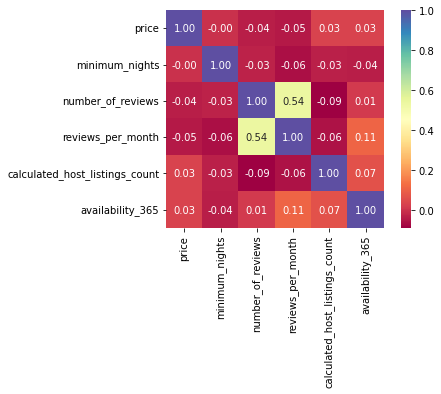

In [75]:
sns.heatmap(corr, cmap='Spectral', fmt='.2f', square = True, linecolor='white', annot=True);

Como pode ser observado no gráfico acima, não há nenhuma relação de correlação relavante entre as variáveis, pois todos os coeficientes possuem valor muito baixo.

## Conclusões##

A análise dos dados permitiu conclusões bem úteis sobre o perfil de alocação de imóveis na cidade de Lisboa através da plataforma AirBNB, entre as quais:
- A média do preço de aluguel diário na cidade de Lisboa é de 121,20 €
- A média mínima de noite para aluguel dos imóveis é de 2,6 noites.
- O tipo de imóvel que possui mais disponibilidade para aluguel em Lisboa é casa completa ou apartamento, com cerca de 80% dos imóveis disponíveis.
- O bairro mais caro para alugar um imóvel é o bairro Ribamar, com valor médio de aluguel de 202 Euros.
- O bairro mais barato para alugar um imóvel é o bairro Vila Franca de Xira, com valor médio de aluguel de 45 Euros.

Após finalizar as análises e tirar as conclusões, foi possível tirar alguns aprendizados bem interessantes, entre quais podem ser destacados:

### Importância do tratamento de dados ###

Neste projeto, o tratamento de dados foi composto de 2 partes:
- Retirar valores ausentes do dataset;
- Retirar Outliers do dataset.

A retirada dos valores ausentes e outliers do dataset fizeram a análise ter muito mais coerência, pois foi percebido alguns valores ilógicos, que levariam a conclusões erradas das análises.

### Importância da amostragem ###

Para analisar os bairros mais caro e mais barato para alugar um imóvel, haviam bairros com uma amostragem muito pequena, o que pode levar a um erro, pois uma amostragem pequena não tem precisão para descrever o comportamento, no caso o preço de aluguel, do grupo todo. Logo, foi necessário descartar as primeiras conclusões e analisar mais profundamente os dados, de forma a ter uma percepção melhor do mundo real.